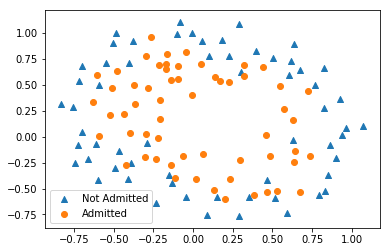

In [1]:
import csv
import sklearn as sk
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as pt
import numpy as np
import scipy
data = np.loadtxt(r'C:\Users\saminens\Desktop\ML\ex2data2.txt', delimiter=",")
x=data[:,0:2]
y=data[:,2:3]
pos=np.where(y==0)[0]
neg=np.where(y==1)[0]
pt.scatter(x[pos,0],x[pos,1],marker='^')
pt.scatter(x[neg,0],x[neg,1],marker='o')
pt.legend(['Not Admitted','Admitted'],fancybox=True)
pt.show()


In [2]:
pf=sk.preprocessing.PolynomialFeatures(6)
x_f=pf.fit_transform(x)
#noting dimensions is imp.
x_f.shape

(118, 28)

In [3]:
def sigmoid(z):
    g=1/(1 + np.exp(-z))
    return g

In [4]:
def h(theta,X):
   
    return sigmoid(X.dot(theta))

In [5]:
# here alpha is the regularisation parameter.
def costfunctionreg(theta,alpha,X,y):
    m,n=X.shape
    h1=h(theta,X)
    theta[0]=0
    reg= (alpha/2)*np.square(theta)
    rcost= y.T.dot(np.log(h1))+(1-y).T.dot(np.log(1-h1))
    J= -(rcost)/m + sum(reg[1:])/m
    return(J)

In [6]:
y.shape


(118, 1)

In [7]:
def gradientreg(theta,alpha,X,y):
    m,n=X.shape
    h2=h(theta.reshape(-1,1),X)
    reg1= (alpha*(theta.reshape(-1,1)))/m
    grad=((h2-y).T.dot(X)/m).T + reg1
      #we need a column matrix  
    return np.ndarray.flatten(grad)

In [8]:
itheta=np.zeros(x_f.shape[1])
cost=costfunctionreg(itheta,1,x_f,y)
grad=gradientreg(itheta,1,x_f,y)
cost


array([ 0.69314718])

In [9]:
optim=scipy.optimize.minimize(costfunctionreg,itheta,jac=gradientreg,method=None,args=(1,x_f,y),options={'maxiter':3000})
optim


      fun: 0.5300109345445478
 hess_inv: array([[  7.00337192e+00,   8.80651203e-01,   3.31034024e+00,
         -6.07369168e+00,  -3.29490189e+00,  -3.61780892e+00,
         -2.83629420e-01,  -1.27801104e+00,  -1.38930681e+00,
         -1.13386976e+00,  -4.93560446e+00,  -5.45527264e-01,
         -1.86205990e+00,  -1.07235149e+00,  -4.13033248e+00,
         -1.33100737e+00,  -7.91148143e-01,  -3.34969636e-01,
         -9.09590231e-01,  -1.03472140e+00,  -2.43668340e+00,
         -3.78702492e+00,  -1.63841747e-01,  -9.35852966e-01,
         -1.12669396e-01,  -1.04379243e+00,  -5.69574187e-01,
         -3.90396896e+00],
       [  8.80651203e-01,   9.32689654e+00,   6.20965192e+00,
         -5.40357712e+00,  -3.54723073e+00,  -3.48185482e+00,
          4.08077265e+00,  -1.43844360e+00,  -8.28227967e-01,
          1.62204654e+00,  -3.48183154e+00,  -2.08589595e-01,
         -1.90665524e+00,  -1.14048285e+00,  -2.23129230e+00,
          1.65951685e+00,  -8.48028671e-01,   1.66389779e-01,
  

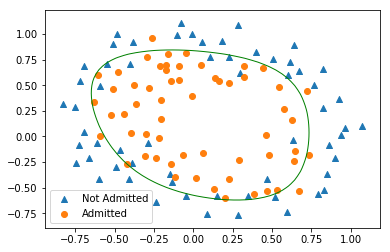

In [10]:

minx1,maxx1=x[:,0].min(),x[:,0].max()
minx2,maxx2=x[:,1].min(),x[:,1].max()
plot_x,plot_y=np.meshgrid(np.linspace(minx1,maxx1),np.linspace(minx2,maxx2))
q= sigmoid(pf.fit_transform(np.c_[plot_x.ravel(),plot_y.ravel()]).dot(optim.x))
q=q.reshape(plot_x.shape)
pt.contour(plot_x,plot_y, q, [0.5], linewidths=1, colors='g')
x=data[:,0:2]
y=data[:,2:3]
pos=np.where(y==0)[0]
neg=np.where(y==1)[0]
pt.scatter(x[pos,0],x[pos,1],marker='^')
pt.scatter(x[neg,0],x[neg,1],marker='o')
pt.legend(['Not Admitted','Admitted'],fancybox=True)
pt.show()

In [11]:
def predict(theta,X,t=0.5):
    p=sigmoid(X.dot(theta.T)) >= t
    return p

In [12]:
accuracy=100*sum(predict(optim.x,x_f)== y.ravel())/y.size
accuracy

82.20338983050847